<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Presicion_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os.path as path
if path.exists('Data'):   
    print ('The folder already exists')
else:
    !wget -nc https://www.dropbox.com/s/ufwmggstfj0xr8c/DatosXYZ.mat?dl=1
    !wget -nc https://www.dropbox.com/s/9vfa4ehuhu76jjl/Data.zip?dl=1
    !wget -nc https://www.dropbox.com/s/zuae8e2s23op9rb/DataPy.zip?dl=1
    !unzip DataPy.zip?dl=1 -d Data/
    !rm DataPy.zip?dl=1
    !unzip Data.zip?dl=1 | awk 'BEGIN { ORS = "" } { print "|" }'
    !rm -r Data.zip?dl=1
    !mv DatosXYZ.mat?dl=1 Data/DatosXYZ.mat

The folder already exists


In [0]:
import numpy as np
import scipy.io

In [25]:
mat = scipy.io.loadmat('Data/DatosXY.mat')
etique = scipy.io.loadmat('Data/LabelFix.mat')
Datos=mat['Datos_C']
Etiq=np.transpose(etique['series'])[:,0]

print (np.shape(Datos))
print (np.shape(Etiq))

(22877, 26)
(22877,)


In [0]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from IPython.display import clear_output

### Training and test data

In [27]:
por=int(np.shape(Datos)[0]*0.8)

X_test=Datos[por:]
X_train=Datos[:por]

y_test=Etiq[por:]
y_train=Etiq[:por]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18301, 26)
(18301,)
(4576, 26)
(4576,)


[ 6.35130720e-02  5.74474689e-02  7.72047740e-02  8.64439790e-02
  9.80591277e-02  2.13345795e-01  1.04700969e-01  4.14816261e-02
  7.44324207e-01 -7.72716409e-12  5.56370914e-04 -9.05162394e+02
  5.57426091e-01  6.01977857e+00  6.34821470e+00  1.11615646e+00
  2.17836077e-01  2.10714286e-01  8.39300000e+02  1.39650582e+00
  2.63095238e-01  2.17836077e-01  7.59254220e-02  3.28546705e-02
  6.04217129e-02 -6.51456164e-01]


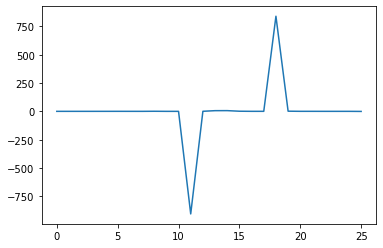

In [28]:
ind = np.random.permutation(X_train.shape[0])
plt.plot(X_train[ind[0],:]);
print(X_train[ind[0]])

In [29]:
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainNx = scaler.fit_transform(X_train)
X_testNx = scaler.fit_transform(X_test)
DatosN=scaler.fit_transform(Datos)

y_trainOHE = np_utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

print(y_trainOHE[ind[0],:])

[1. 0.]


[ 1.38630081  0.57512029  0.38561783 -0.07398381  1.37681209  0.25693854
 -0.02772278 -0.31084348 -0.1176522  -0.36784446  0.06977322  0.50372568
 -0.05772835 -0.18477554 -0.37122655  0.06377114  0.00729828  0.24231405
  0.50898418  0.50897713  0.90165588  0.00729828 -0.29265096 -0.45609679
 -0.53877959 -0.39890024]


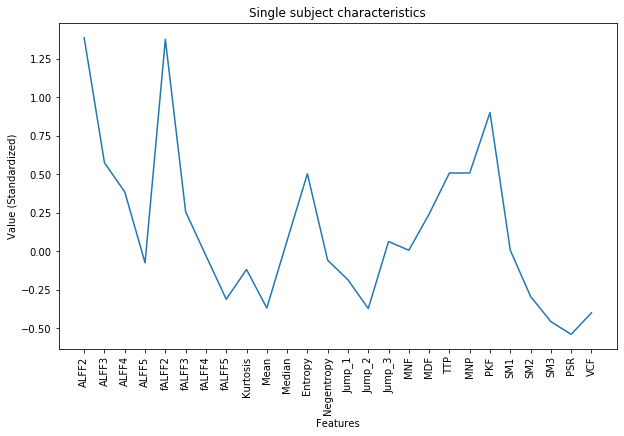

In [30]:
plt.figure(figsize=(10,6))
plt.plot(X_trainNx[ind[0],:]);
plt.title('Single subject characteristics')
plt.xlabel('Features')
pos=np.arange(26)
lab=['ALFF2','ALFF3','ALFF4','ALFF5','fALFF2','fALFF3','fALFF4','fALFF5','Kurtosis','Mean','Median','Entropy','Negentropy','Jump_1','Jump_2','Jump_3','MNF','MDF','TTP','MNP','PKF','SM1','SM2','SM3','PSR','VCF']
plt.xticks(pos,lab, rotation='vertical')
plt.ylabel('Value (Standardized)')
print(X_trainNx[ind[0]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.decomposition import FastICA, PCA

In [32]:
bat=500
reg=0.4
epo=100
pre1=[]
pre2=[]
pre3=[]
pre4=[]
  
for co in range(0,26,1):
  #print("Componentes ", co)  
  #pca = PCA(n_components=co)
  #X_trainN = pca.fit_transform(X_trainNx)
  #X_testN = pca.fit_transform(X_testNx)
  
  X=np.transpose((X_trainNx[:,co], X_trainNx[:,co], X_trainNx[:,co], X_trainNx[:,co]))
  X=np.concatenate((X,X), axis=1)
  
  X2=np.transpose((X_testNx[:,co], X_testNx[:,co], X_testNx[:,co], X_testNx[:,co]))
  X2=np.concatenate((X2,X2), axis=1)
  
  X_trainN = X
  X_testN = X2
  
  input_dim = X_testN.shape[1]
  print (input_dim)
  print (nb_classes)
  
  #First model
  model = Sequential()
  model.add(Dense(13, input_dim=input_dim))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(6))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(nb_classes, activation='softmax'))
  
  #Second model
  model2 = Sequential()
  model2.add(Dense(8, input_dim=input_dim))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(4))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(nb_classes, activation='softmax'))
  
  #Third model
  model3 = Sequential()
  model3.add(Dense(16, input_dim=input_dim))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(8))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(4))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(nb_classes, activation='softmax'))

  #Fourth model
  model4 = Sequential()
  model4.add(Dense(8, input_dim=input_dim))
  model4.add(Activation('tanh'))
  model4.add(Dropout(reg))
  model4.add(Dense(nb_classes, activation='softmax'))

  #model parameters
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  
  print("Training model 1...")
  history1x=model.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 2...")
  history2x=model2.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 3...")
  history3x=model3.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 4...")
  history4x=model4.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  
  #clear_output(wait=True)  
  preds = model.predict_classes(X_testN, verbose=0)
  Accuracy = np.mean(preds == y_test)
  pre1.append(Accuracy)  
  print('Accuracy = ', Accuracy*100, '%')
    
  preds2 = model2.predict_classes(X_testN, verbose=0)
  Accuracy2 = np.mean(preds2 == y_test)
  pre2.append(Accuracy2)
  print('Accuracy = ', Accuracy2*100, '%')  
  
  preds3 = model3.predict_classes(X_testN, verbose=0)
  Accuracy3 = np.mean(preds3 == y_test)
  pre3.append(Accuracy3)
  print('Accuracy = ', Accuracy3*100, '%')
  
  preds4 = model4.predict_classes(X_testN, verbose=0)
  Accuracy4 = np.mean(preds4 == y_test)
  pre4.append(Accuracy4)
  print('Accuracy = ', Accuracy4*100, '%')
  
  del model
  del model2
  del model3
  del model4
  #del pca

8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  89.57604895104895 %
Accuracy =  89.5104895104895 %
Accuracy =  89.57604895104895 %
Accuracy =  89.2701048951049 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  94.99562937062937 %
Accuracy =  94.88636363636364 %
Accuracy =  94.7770979020979 %
Accuracy =  94.88636363636364 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  92.52622377622379 %
Accuracy =  92.48251748251748 %
Accuracy =  91.89248251748252 %
Accuracy =  92.3951048951049 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  89.94755244755245 %
Accuracy =  89.66346153846155 %
Accuracy

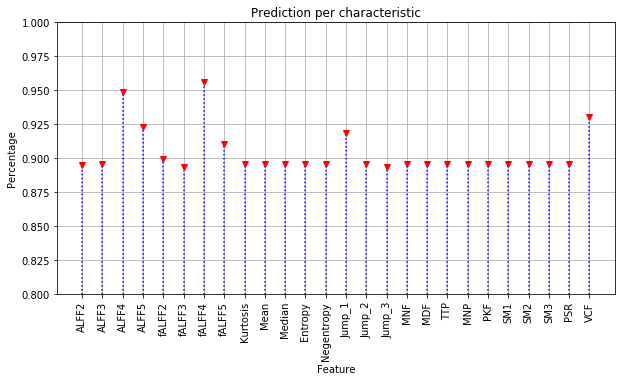

In [33]:
pos=np.arange(26)
plt.figure(figsize=(10,5))
plt.stem(pos, np.mean(np.transpose((pre1,pre2,pre3,pre4)), axis=1), linefmt=':b', markerfmt='vr')
plt.title('Prediction per characteristic')
plt.xlabel('Feature')
plt.ylabel('Percentage')
plt.ylim([0.8, 1])
plt.xticks(pos,lab, rotation='vertical')
plt.grid()


In [0]:
accuracy=np.mean(np.transpose((pre1,pre2,pre3,pre4)), axis=1)
ind=np.argsort(accuracy)[::-1]

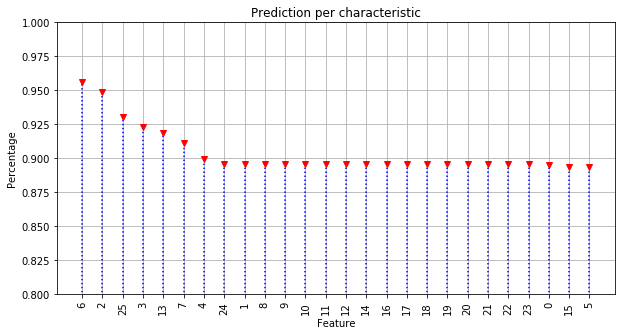

In [45]:
plt.figure(figsize=(10,5))
plt.stem(pos, accuracy[ind], linefmt=':b', markerfmt='vr')
plt.title('Prediction per characteristic')
plt.xlabel('Feature')
plt.ylabel('Percentage')
plt.ylim([0.8, 1])
plt.xticks(pos,ind, rotation='vertical')
plt.grid()

In [56]:
for i in ind:
  print(lab[i])
print(accuracy[ind])

fALFF4
ALFF4
VCF
ALFF5
Jump_1
fALFF5
fALFF2
PSR
ALFF3
Kurtosis
Mean
Median
Entropy
Negentropy
Jump_2
MNF
MDF
TTP
MNP
PKF
SM1
SM2
SM3
ALFF2
Jump_3
fALFF3
[0.95602054 0.94886364 0.93006993 0.92324082 0.9183785  0.91078453
 0.89953016 0.89576049 0.89576049 0.89576049 0.89576049 0.89576049
 0.89576049 0.89576049 0.89576049 0.89576049 0.89576049 0.89576049
 0.89576049 0.89576049 0.89576049 0.89576049 0.89576049 0.89483173
 0.89373907 0.89352054]


In [57]:
ind

array([ 6,  2, 25,  3, 13,  7,  4, 24,  1,  8,  9, 10, 11, 12, 14, 16, 17,
       18, 19, 20, 21, 22, 23,  0, 15,  5])